In [1]:
import pytesseract
import win_unicode_console
win_unicode_console.enable()
import csv
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import pandas as pd
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
from IPython.core.display import display
from IPython.core.display import Image as asd
import argparse
import cv2
import os
from matplotlib import pyplot as plt

c:\users\user 1\appdata\local\programs\python\python35\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


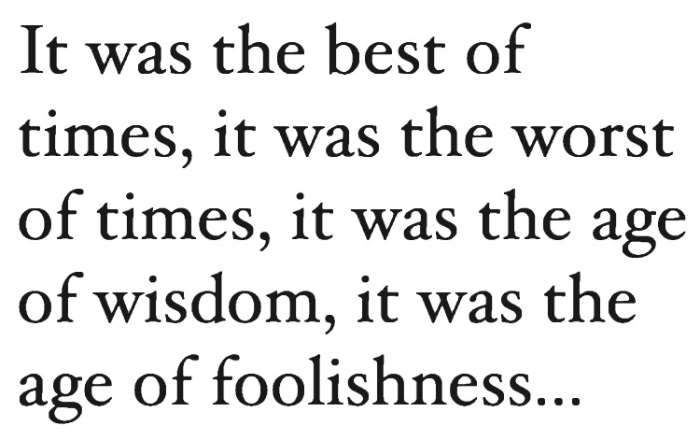

In [2]:
# read image from directory and use the pytesseract to read text from image
text = pytesseract.image_to_string(Image.open("text1.png"))
result = text.split("\n")

# display the image
display(asd(filename='text1.png'))

In [3]:
# print the text

for x in result:
    print(x)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...


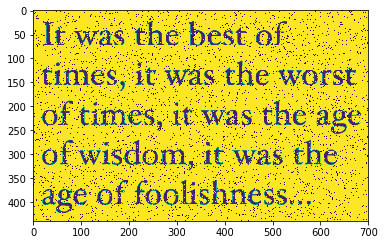

In [4]:
# Adding some noise to the image to test the accuracy of the reading the text from image

import random

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noisy_image = cv2.imread('text1.png',0) # Only for grayscale image
noise_img = sp_noise(noisy_image,0.05)
cv2.imwrite('gg_new.jpg', noise_img)

plt.imshow(noise_img)

In [5]:
# Its failed to convert the image into text because of the noise in the image

text = pytesseract.image_to_string(Image.open("gg_new.jpg"))
result3 = text.split("\n")

for x in result3:
    print(x)

In [6]:
# technique to improve the accuracy of reading text from noisy image (Thresshold and blurring)

image = cv2.imread('gg_new.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply thresholding to preprocess the
# image
gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# median blurring should be done to remove
# noise
gray = cv2.medianBlur(gray, 3)



# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)


True

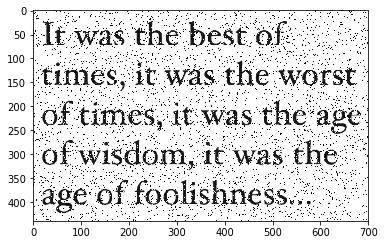

In [7]:
# Convert image into gray colour without changing the threshold and the blurring
# the result still bad

# show the output images
# The important part - Correct BGR to RGB channel
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Plot
plt.imshow(img)

text = pytesseract.image_to_string(image)
print(text)


It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...


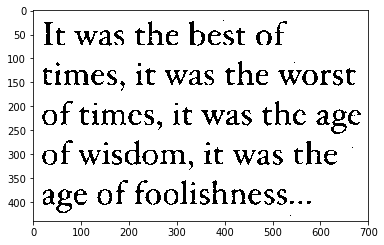

In [8]:
# now applying the thresshold and blur to the image
# the result in perfect

# The important part - Correct BGR to RGB channel
img2 = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
# Plot
plt.imshow(img2)

text = pytesseract.image_to_string(gray)
print(text)